<a href="https://colab.research.google.com/github/gianmarco-holm/PY05_MachineLearning_LogisticRegressionBinomial_ChurnPrediction/blob/main/PY05_MachineLearning_LogisticRegressionBinomial_ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lógística binomial de Telco

Este proyecto consiste en predecir que clientes van a decidir abandonar o quedarse en la empresa de telecomunicaciones Telco.

## Carga de datos

In [1]:
# Librerías para ETL
import pandas as pd
import numpy as np

In [2]:
# Librerías de acceso
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Librerías para machine learning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Configuración para visualización
sns.set_style('dark')
sns.set_context('notebook', font_scale=.8, rc={'figure.figsize':(15,10)})
sns.set_palette('dark')
sns.set_color_codes()

In [6]:
df_data = pd.read_csv('./drive/MyDrive/machine_learning/data/Telco-Customer-Churn.csv')

## Análisis Exploratorio de datos

In [7]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Dimension de la data
(
    df_data
    .shape
)

(7043, 21)

In [9]:
# Información de cada columna
(
    df_data
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Cantidad de tipo de Variables
(
    df_data
    .dtypes
    .value_counts()
)

object     18
int64       2
float64     1
Name: count, dtype: int64

In [11]:
# Análisis de las variables categóricas
(
    df_data
    .select_dtypes(include='object')
    .describe()
)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Transformación de datos

In [12]:
# Cambiar total_charges a numeric
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

In [13]:
# Manejo de datos nulos
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# Eliminamos todas las filas de la tabla
df_data.dropna(inplace=True)

In [15]:
# Eliminamos el ID porque es un identificador interno de la empresa y no va a servir en este caso
df_data.drop('customerID',axis=1,inplace=True)

In [16]:
# Convertir a numérico variable objetivo
label_encoder = LabelEncoder()
df_data['Churn'] = label_encoder.fit_transform(df_data['Churn'])

In [17]:
# Generamos una copia de la data transformada
df_data_processing = df_data.copy()

In [18]:
# Manejo de variables categóricas
df_data_processing = pd.get_dummies(df_data_processing, drop_first=True)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


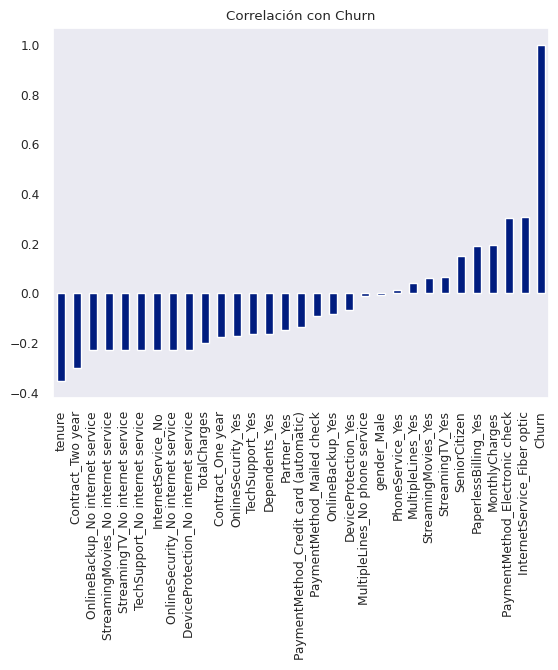

In [19]:
# Analisis de correlación
matrix_correlation_churn = df_data_processing.corr()['Churn'].sort_values().plot(kind='bar', title='Correlación con Churn')

## Escalamiento de los datos

In [20]:
# Utilizamos el metodo de escalamiento de MinMax porque nuestros datos tiene rangos conocidos y queremos que la estandarización se encuentre entre 0 y 1
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [21]:
# Convertimos a dataframe el array que devuelve el escalamiento
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [22]:
# Le colocamos los nombres de las columnas
df_data_processing_scaled.columns = df_data_processing.columns

In [23]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Análisis de datos

In [24]:
# Función para ver el conteo de cada variable categorica separando los que abandonaron o no la empresa
def plot_category(column):
  sns.countplot(data=df_data, x=column, hue='Churn')
  plt.show()

In [25]:
# Nombre de las columnas categoricas
columns_category = df_data.select_dtypes(include='object').columns

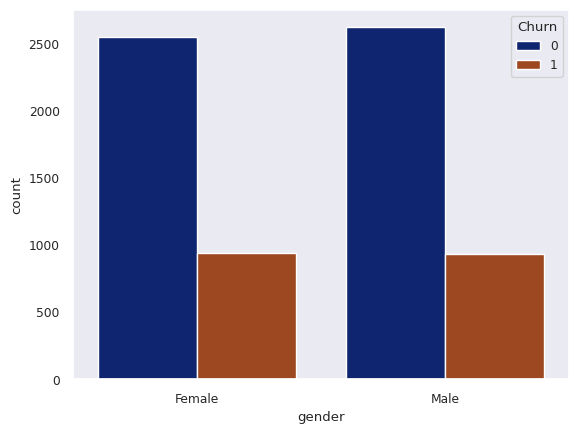

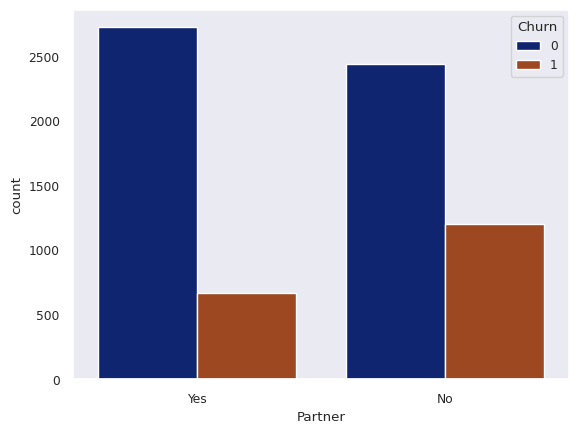

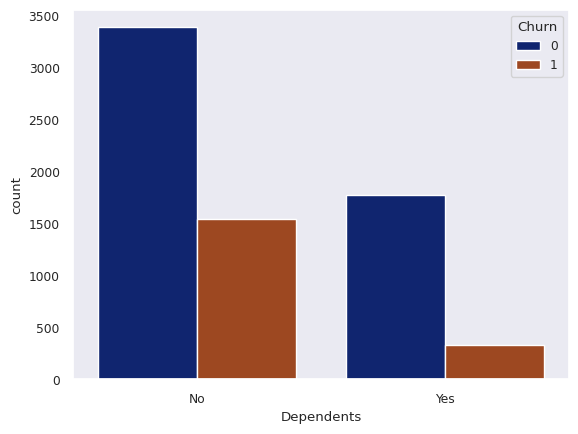

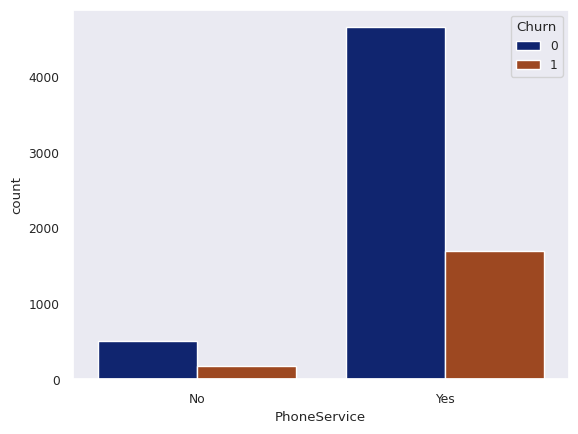

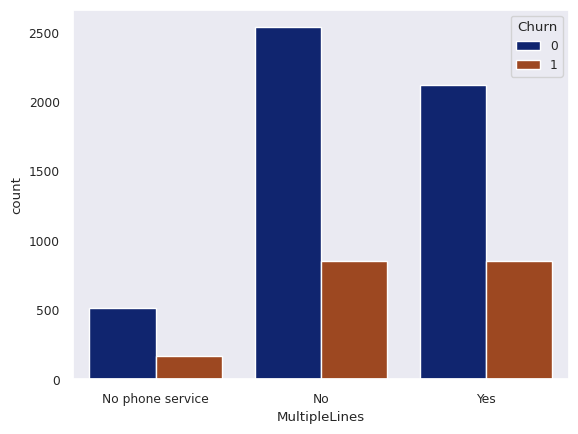

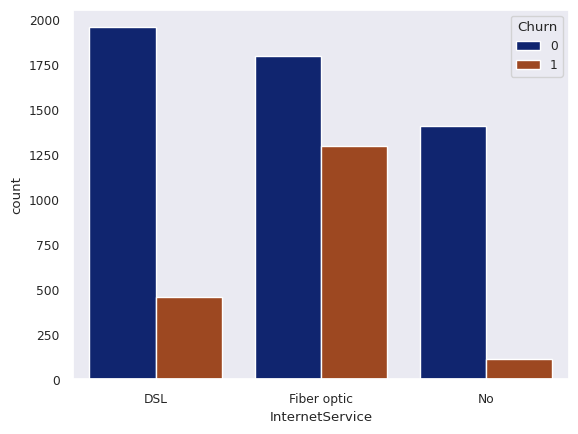

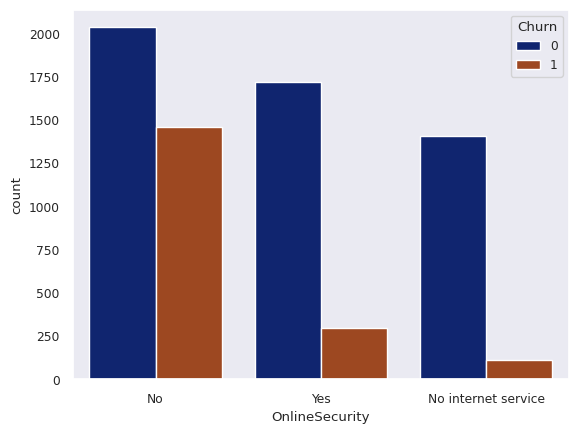

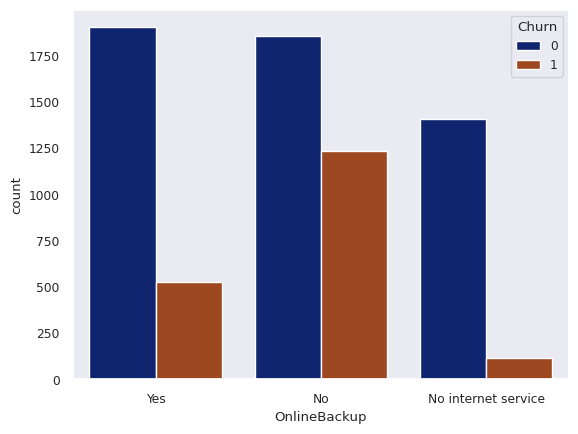

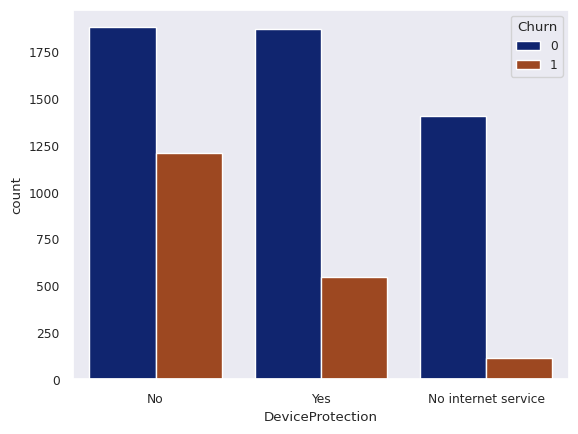

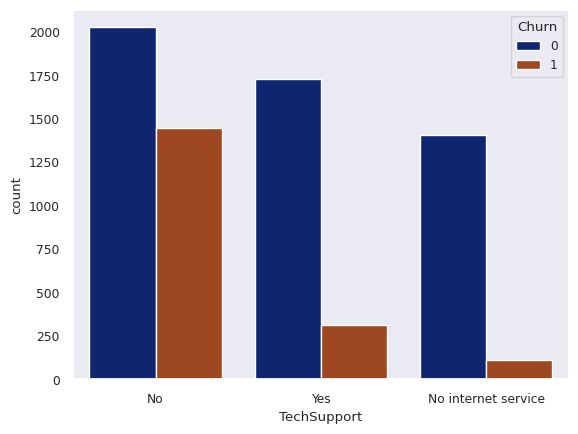

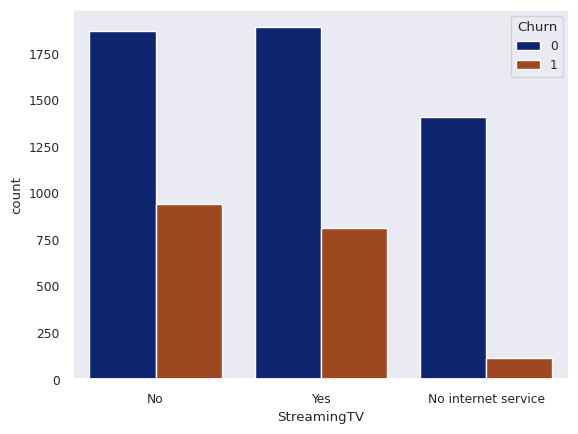

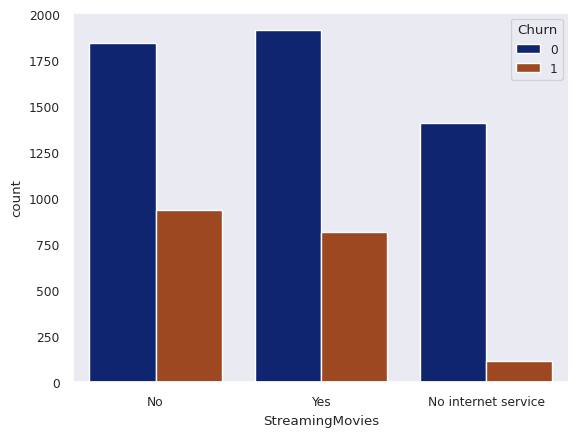

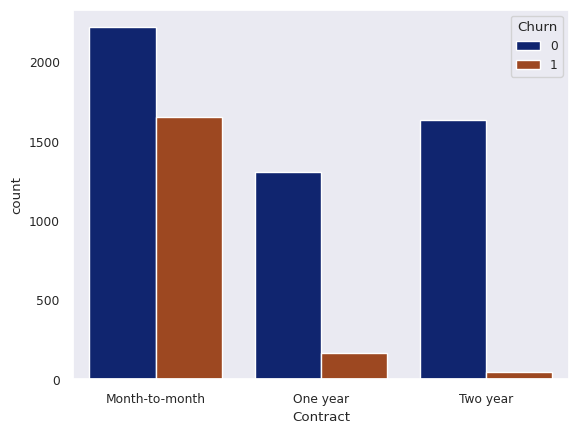

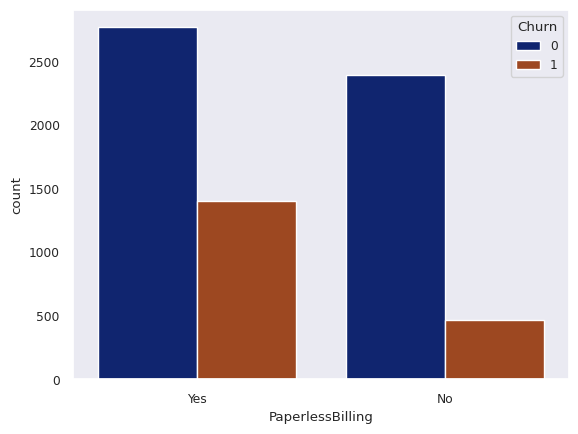

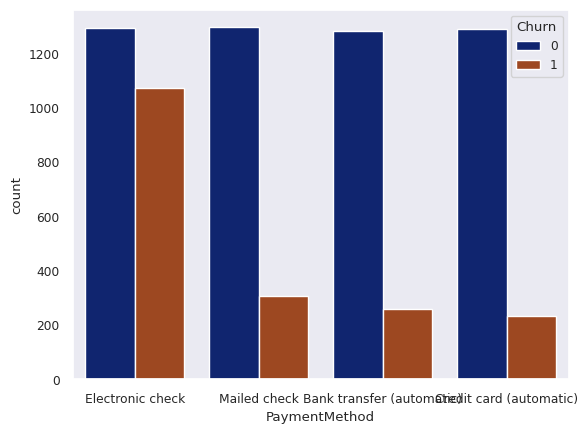

In [26]:
# Análisis de las variables categoricas
# Ejecutando la función para todas las variables categoricas
for _ in columns_category:
  plot_category(_)

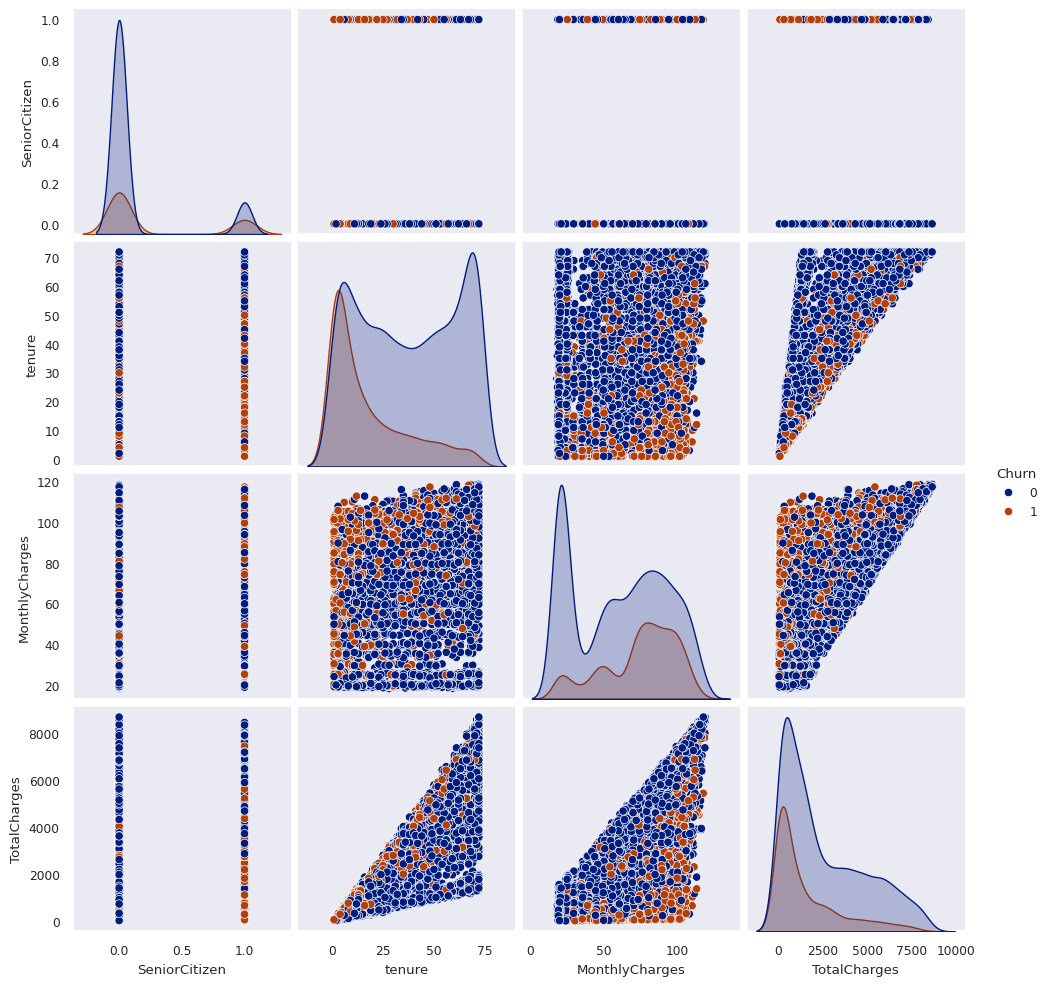

In [27]:
# Análisis de las variables númericas
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [39]:
# Separamos las variables dependiente de las independientes
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [40]:
# Separamos el conjunto de datos para el entrenamiento y para el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [43]:
# Entrenamos el modelo
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

In [44]:
# Realizamos la predicción
prediction = model.predict(X_test)

## Evaluación del modelo

In [32]:
# Visualizamos las probabilidades que sea 0 o 1
model.predict_proba(X_test)

array([[0.9900733 , 0.0099267 ],
       [0.86260748, 0.13739252],
       [0.30246025, 0.69753975],
       ...,
       [0.99015604, 0.00984396],
       [0.70085651, 0.29914349],
       [0.82812473, 0.17187527]])

In [33]:
# Vemos los coeficientes de cada variable dependiente
# Nos ayuda a saber que variable es mas importante
model.coef_

array([[ 0.22035058, -3.12507861, -0.10677561,  1.20430842, -0.0231496 ,
         0.1211656 , -0.25563979, -0.22952716,  0.21292584,  0.21033512,
         0.91161368, -0.11549255, -0.11549255, -0.38784332, -0.11549255,
        -0.07610719, -0.11549255, -0.02221961, -0.11549255, -0.35122839,
        -0.11549255,  0.258926  , -0.11549255,  0.26175833, -0.82099263,
        -1.37880107,  0.20788667, -0.15752054,  0.21943162, -0.07633099]])

In [34]:
# Nombre de cada variable dependiente del modelo
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

Axes(0.125,0.11;0.775x0.77)


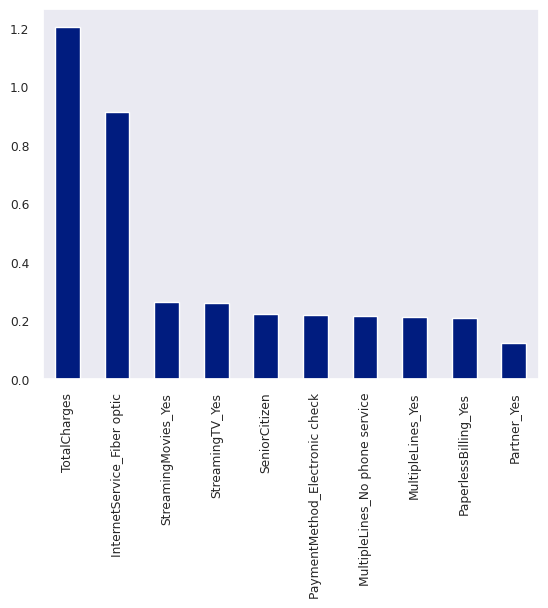

In [35]:
# Vemos que variable tiene un mayor peso
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


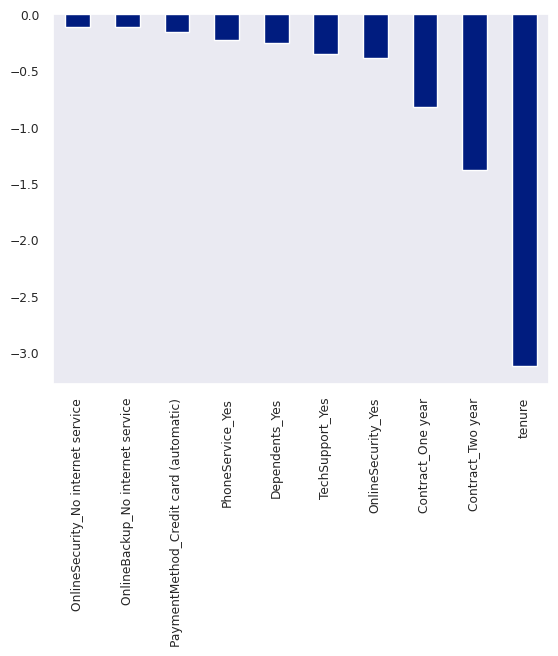

In [36]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [49]:
# Métricas de Evaluación
accuracy =  metrics.accuracy_score(y_test, prediction)
conf_matrix = metrics.confusion_matrix(y_test, prediction)
classification = metrics.classification_report(y_test, prediction)
print("Accuracy: {}".format(accuracy))
print("Classification Report:\n {}".format(classification))
print("Confusion Matrix:\n {}".format(conf_matrix))

Accuracy: 0.7882018479033405
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1033
         1.0       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[917 116]
 [182 192]]


**Conclusiones:**
1. La precisión es de 78% lo cual es aceptable
2. Tenemos un 62% de precisón con 1.0 en la clasificación de reporte, lo que significa que el 38% son falsos positivos, además tenemos 51% de 1.0 que son de recall, lo que significa que 49% de los datos no fueron predecidos correctamente.
3. Tambien tenemos la matriz de confusión lo que significa que 192 valores de 1.0 fueron predecidos correctamente y 917 de 0.0

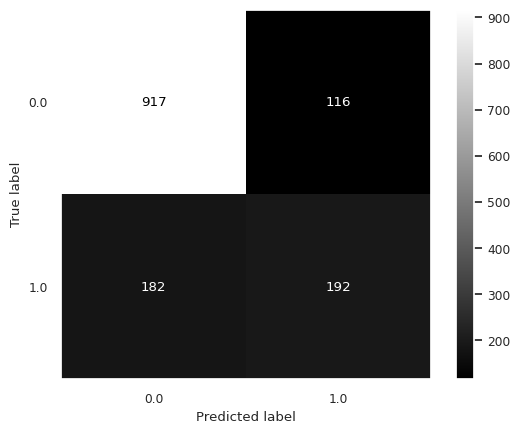

In [53]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()